# 로지스틱 회귀 

- 이름은 회귀이지만 사실은 분류모델 , 선형회귀와 헷갈리면 안 됨 
- 이진 분류 & 다중 분류 
- 분류 모델인 로지스틱 회귀도 다중 회귀를 위한 선형 방정식이므로 확률값으로 출력해야 함 
- 즉, 0~1까지의 값을 가짐 


## activation function


### 1. sigmoid function
- 시그모이드 : S자형 
- 일차함수(선형회귀)와 달리 곡선형태 (smooth)
- 함수로서 유계이며, 미분가능한 함수 
- 모든 점에서 음이 아닌 미분값
- 단 하나의 변곡점을 갖는다, (x=0)

####  sigmoid function의 단점 
- Activation function으로 사용하는 것을 추천하지 않는다.
- 입력값이 일정 범위의 safety zone을 넘어가는 순간 리미트 값이 0또는 1로 수렴하게 되어 gradient(경사값)이 0으로 수렴하게 된다. 
- 0을 기준으로 데이터가 분포하는 것이 일반적인데 시그모이드 함수의 경우에는 범위가 [0,1]이므로 만족하지 않는다. 
- 다른 활성화 함수와 비교했을때, exp()연산에 많은 비용이 든다. 효율적이지 못함 

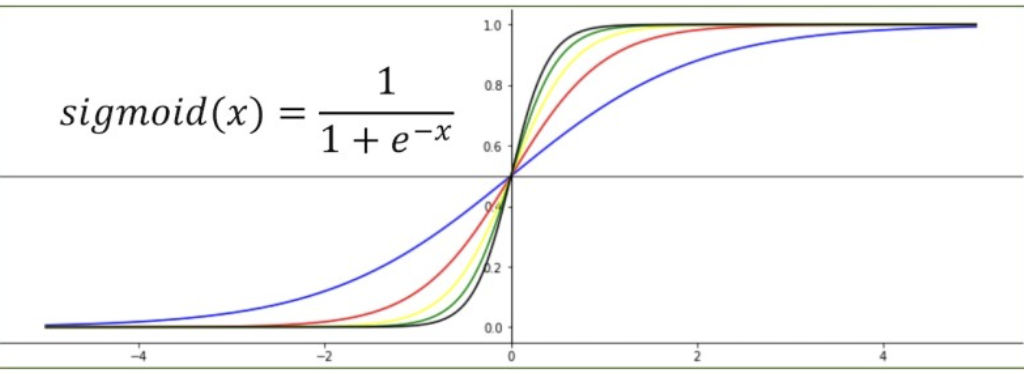

### sigmoid function derivative 과정 
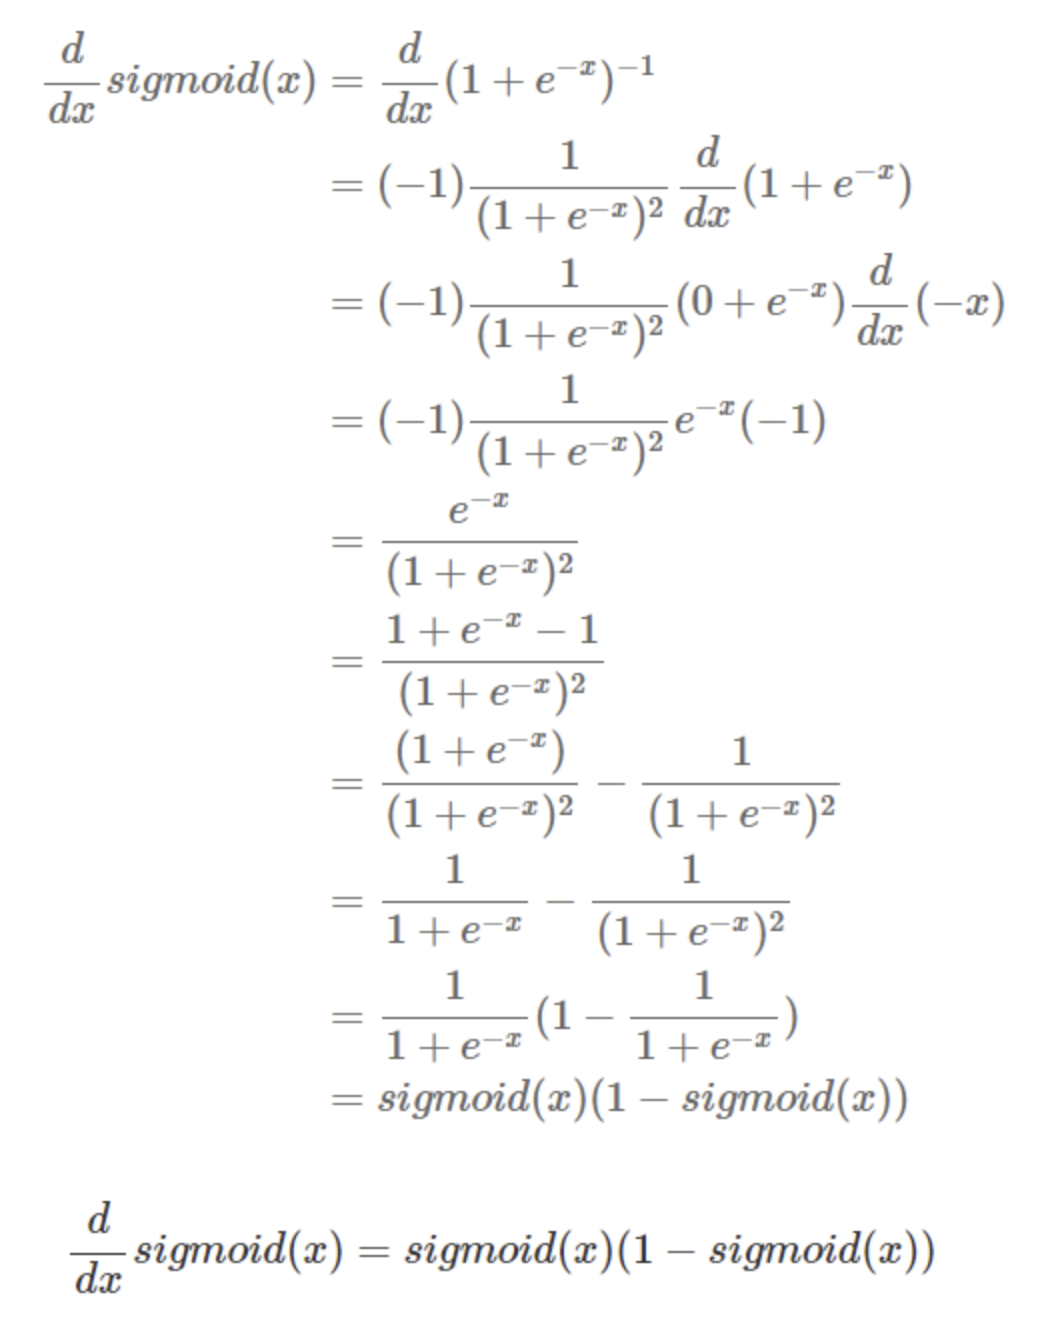

### sigmoid function derivative
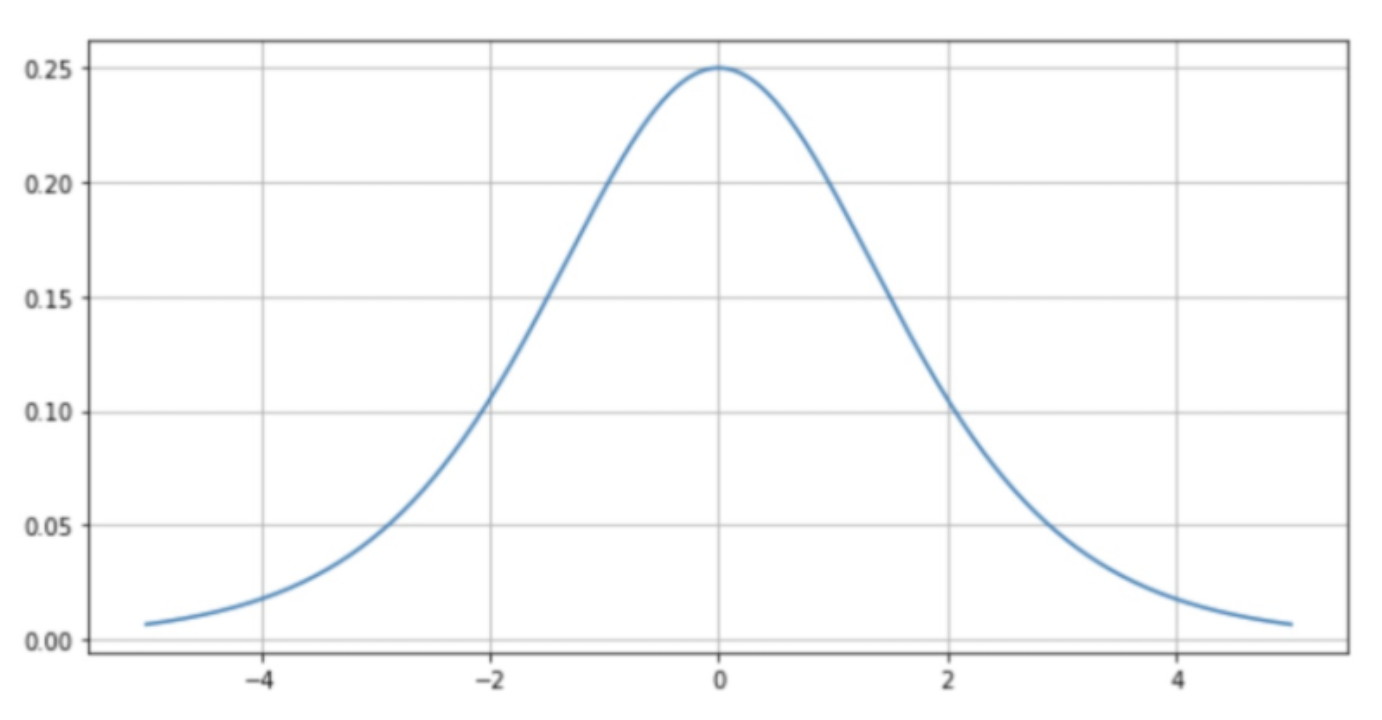

- 위의 도함수의 미분계수를 보면 최댓값은 0.25로 딥러닝에서 가중치 학습을 위해서 역전파를 계산하는 과정에서 출력값이 1보다 작으므로 기울기 소멸 문제가 빠르게 발생할 수 있다. 

### 2. Softmax function 

- 로지스틱 함수의 다차원 일반화 
- 다항 로지스틱 회귀분석이며 , 선형 분류를 여러번 결합한 것 (다중 클래스 분류모델을 만들때 사용됨)
- 선택해야하는 선택지가 k개 있을 때, k차원의 벡터를 입력받아서 각 클래스에 대한 확률을 추정하는 함수 
- 출력층에서 사용되는 함수 , 출력값들의 합이 1이 됨.






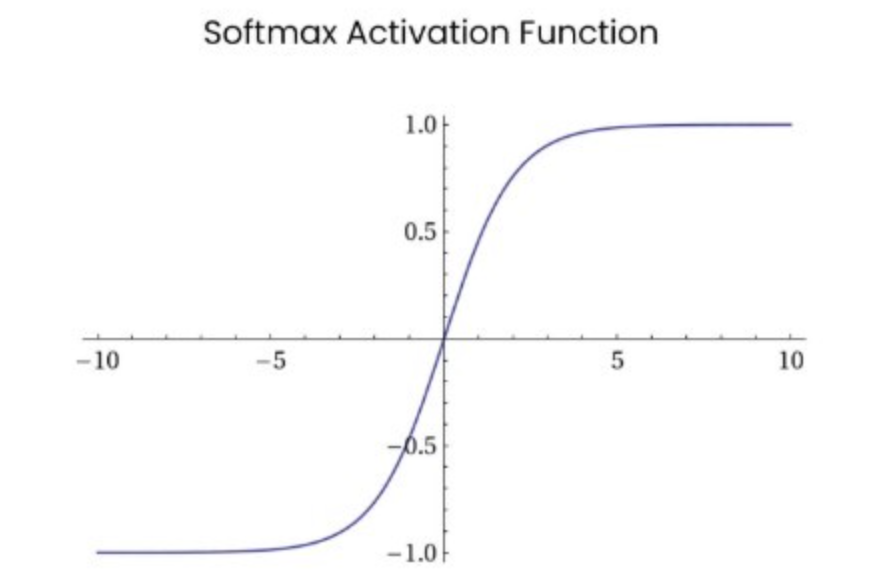

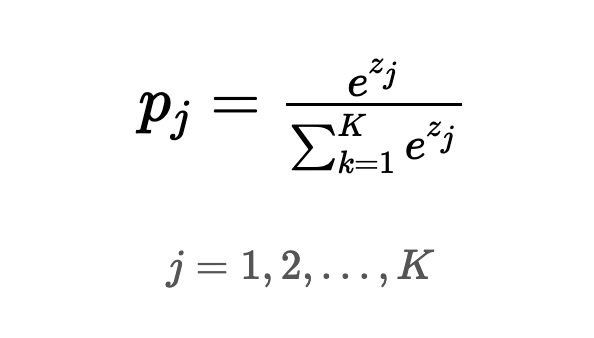


- k는 클래스 수 
- Zi는 소프트맥스 함수의 입력값 
- 지수함수가 사용되는 이유: 미분 가능하도록 하기 위함 


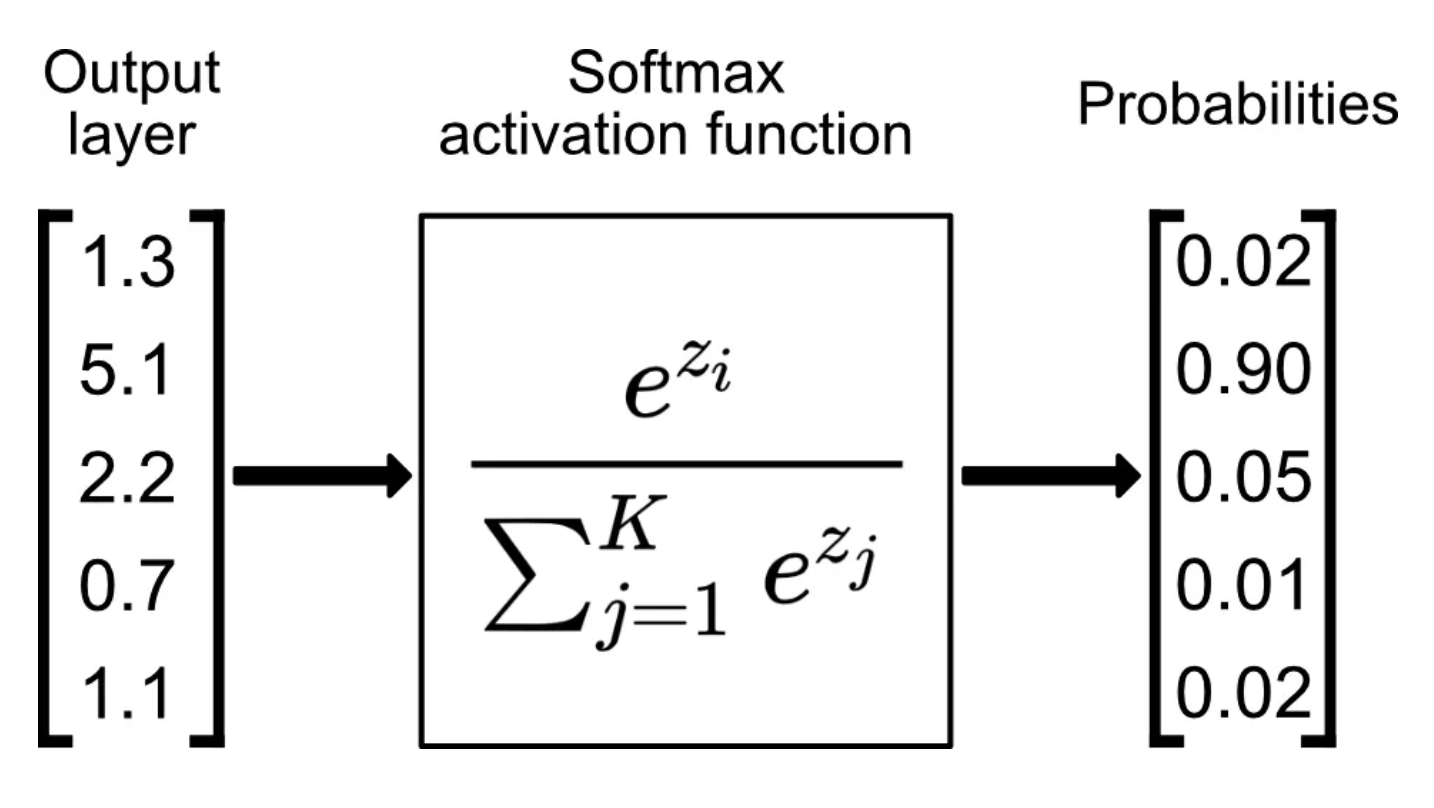

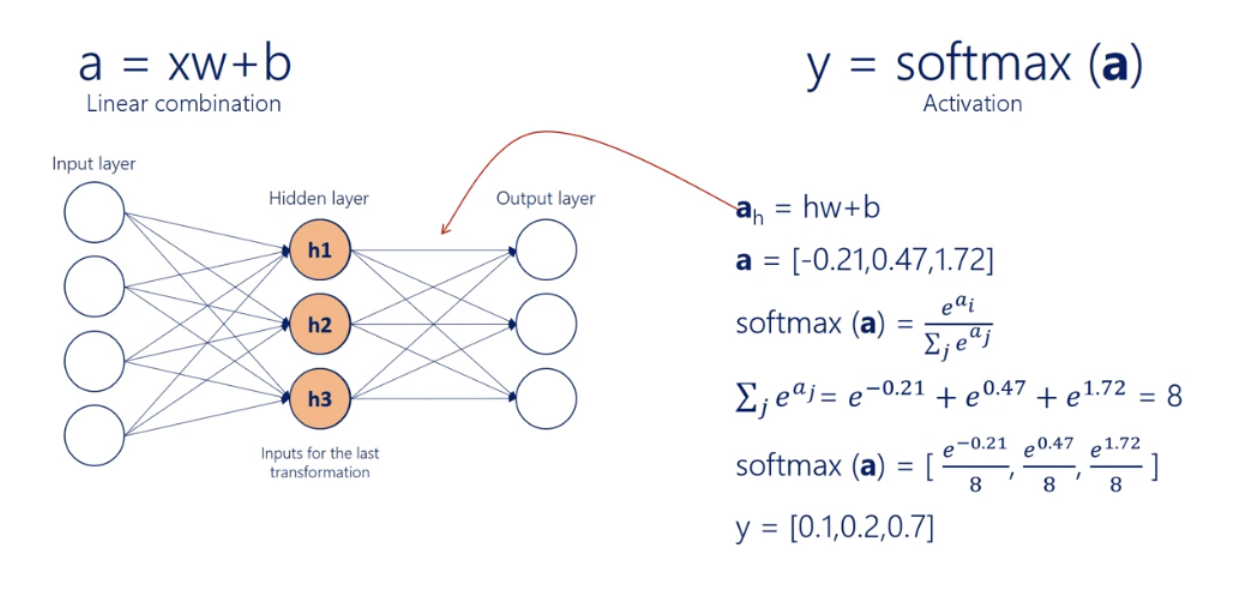

## 정리 
로지스틱 회귀 모델은 종속 변수와 독립변수 사이의 관계에서 선형모델과 차이점이 있다 

- 로지스틱 회귀란? 선형 방정식을 사용한 분류 알고리즘. 선형 회귀와 달리 시그모이드, 소프트맥스 함수를 사용하여 클래스 확률을 출력함
- 다중 분류란? 타깃 클래스가 2개 이상인 분류 문제. 로지스틱 회귀는 다중 분류를 위해 소프트맥스 함수를 사용하여 클래스를 예측함
- 시그모이드 함수란? 로지스틱 함수라고도 함. 출력을 0과 1 사이의 값으로 압축하며 이진 분류를 위해 사용됨
- 소프트 맥스 함수란? 다중 분류에서 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 만듦

### Logit , Sigmoid and Softmax의 관계 정리 

> 관련 링크: https://chacha95.github.io/2019-04-04-logit/

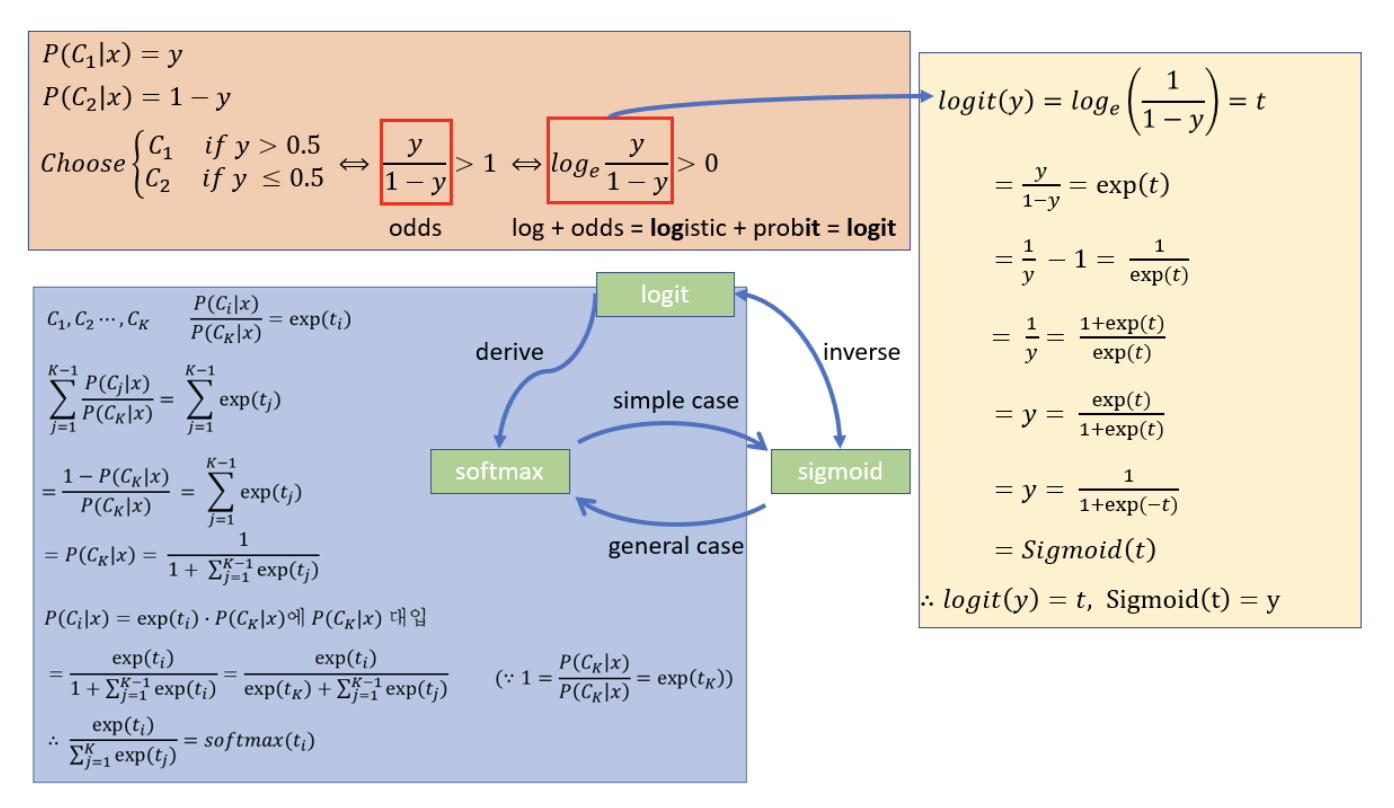

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# 넘파이 배열로 바꾼다

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [4]:
fish_input

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [5]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [6]:
fish_target = fish['Species'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
test_scaled[:5] # 앞에 5줄만 보겠다 

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

### k-최근접 이웃 분류기 확률 예측 

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [11]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
print(kn.predict(test_scaled[:5]))


['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [13]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [14]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## logistic regression

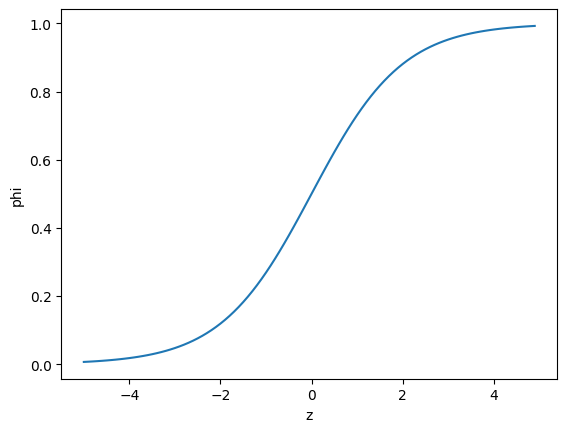

In [15]:

import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [16]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [17]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [18]:
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [19]:
train_bream_smelt

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174],
       [-1.0824759 , -1.61150165, -1.62162731, -1.7000674 , -1.92815631],
       [ 0.10337949,  0.04717013,  0.23714575,  0.88445197,  0.41799764],
       [ 1.49668216,  1.03112796,  1.21864741,  2.44274986,  1.40289707],
       [ 0.23004337,  0.23459067,  0.42823457,  1.3336029 ,  0.39983213],
       [-0.42579405, -0.29018684, -0.11028847,  0.65627104, -0.26107519],
       [ 1.28557569,  0.70314202,  0.89727076,  1.98228866,  1.06683526],
       [ 0.93373158,  0.60943175,  0.83646978,  1.85150445,  0.97832415],
       [ 0.80706771,  0.60943175,  0.81041221,  1.63137406,  1.0255057 ],
       [-1.07262426, -1.52716241, -1.5

In [20]:
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [22]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [23]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [24]:
print(lr.classes_)

['Bream' 'Smelt']


In [25]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [26]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [27]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

In [28]:

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [29]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [30]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [31]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [32]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [33]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [34]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 로지스틱 손실함수(이진 크로스엔트로피 손실 함수)

### 손실함수 (loss function = L)
####  손실함수의 역할
- 학습과정이 올바르게 이뤄질 수 있도록 적절한 가이드를 제공하는 것 

#### 손실함수 개념 
- 손실함수의 결과값을 작게 만들기 위해서 가중치 매개벼수를 조작해나가는 과정이 학습 
- 이 과정에서 각각의 가중치 매개변수를 어디로 얼마나 조절해야 손실 함수의 결과값이 적어질지 결정할때 참고하는 것이 미분값
- 머신러닝에서 모델이 나타내는 확률 분포와 데이터가 따르는 실제 확률 분포 사이의 차이를 나타내는 함수 
- 값이 0에 가까울 수록 모델의 정확도가 높아지며, 0에서 멀어질 수록 모델의 정확도가 떨어짐.


#### 손실함수를 사용하는 이유 
- 우리들의 목표는 높은 정확도를 끌어내는 것 
- 미분(기울기)의 역할에 주목한다. 
- 최적의 매개변수(가중치와 편향)을 탐색할 때 손실함수의 값을 가능한 작게 하는 매개변수 값을 찾게 된다. 
- 매개변수의 미분(기울기)를 계산하고, 그 미분값을 단서로 매개변수의 값을 갱신하는 과정을 반복한다, 
- 미분값이 음수이면 매개변수를 양의 방향으로 변화시키고, 양수이면 음의 방향으로 변화시키면서 손실함수의 값을 줄인다. 미분값이 0인경우 매개변수의 갱신은 멈추게 된다. 
- 
- 정확도를 사용하지 않고 손실함수를 사용하는 이유는 손실함수는 연속적인 값을 리턴하기 때문이다.
- 정확도를 사용하는 경우 그래프가 계단식으로 그려져서 대부분의 구간에서 기울기가 0이다. 


### <자주 사용되는 대표적인 2가지 손실함수>
1. MSE ( mean squared error) : 평균제곱오차 
- 회귀에서 항등함수의 손실함수로 주로 사용됨 

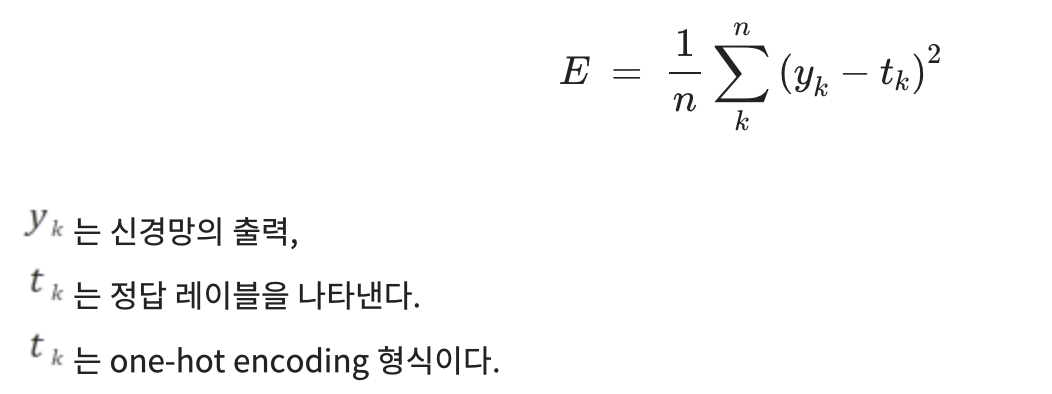


2. CEE(cross entropy error) : 크로스 엔트로피 오차 
- 분류에서 소프트맥스의 손실함수로 주로 사용됨 

### 손실함수 개요

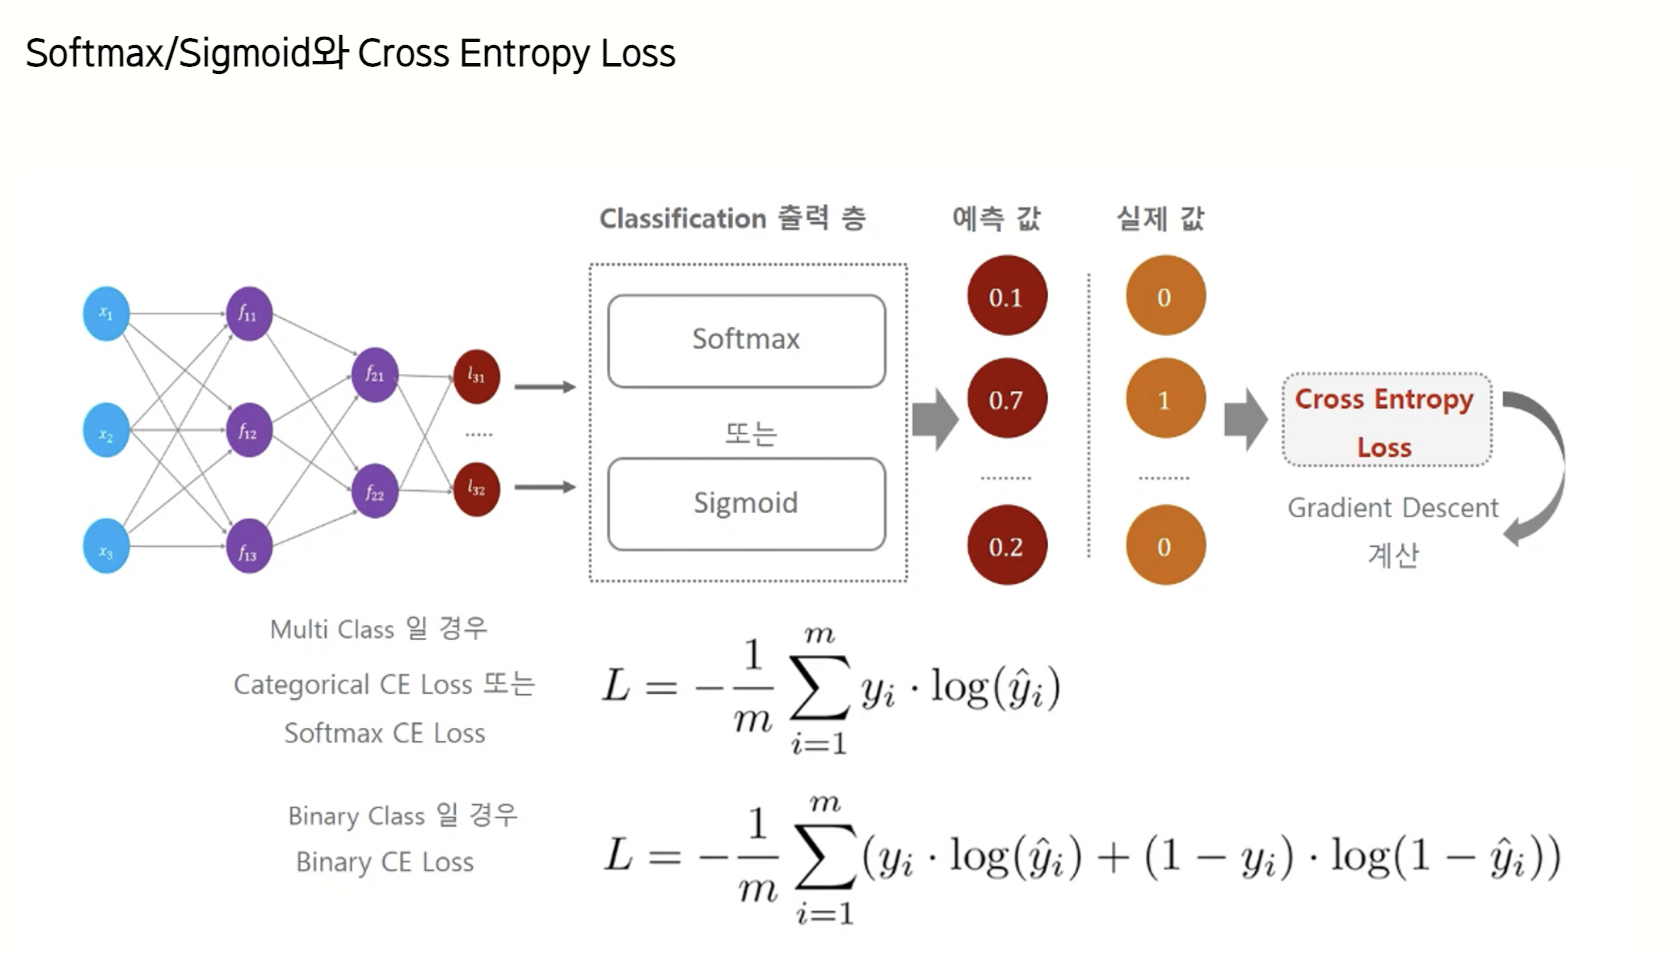

<이진 크로스엔트로피 손실함수>
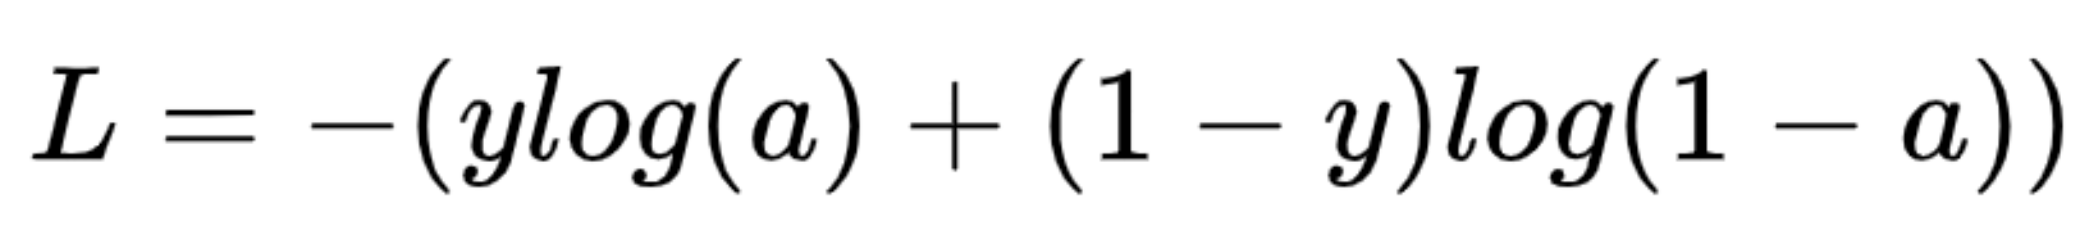
- a는 예측 확률 
- y는 지표 (이진 분류의 경우 0 or 1)


- 로지스틱 손실함수는 결과가 양성일 때, 음성일 때로 분리하여 생각할 수 있다.
- 양성일때, 즉 y=1일때는 -log(a)이고, 음성일때 즉 y=0 일때는 -log(1-a)로 정리할 수 있다. 
- 이때 a의 범위는 0~1의 범위를 갖는다. 
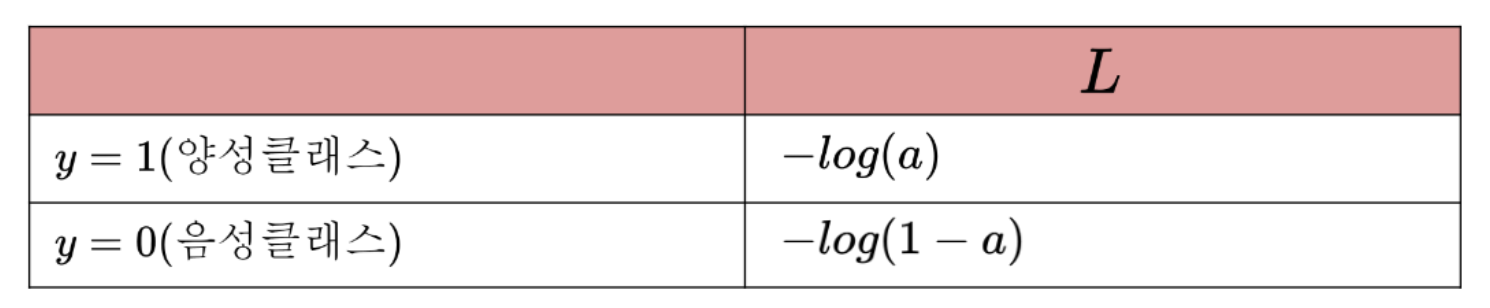

0<x<1일때의 로그함수 

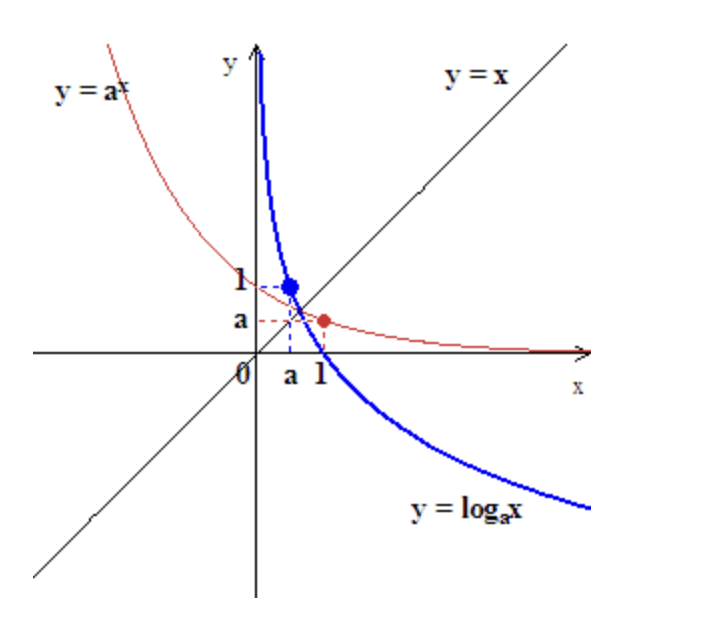

< 양성일때 >
- 샘플이 올바르게 분류되기 위해서는 a의 값이 1이 되어야 하며 L값이 최소화 될때 a가 자연스럽게 1이 됨.


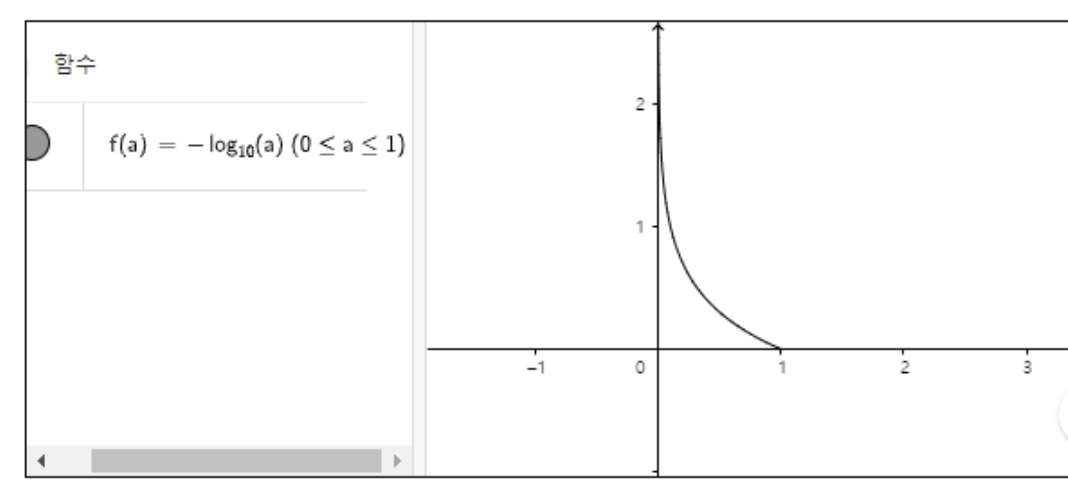

<음성일때>
- 샘플이 올바르게 분류되기 위해서는 a가 0이 되어야하며, 마찬가지로 L이 최소화 될 때, a가 자연스럽게 0에 가까워진다. 
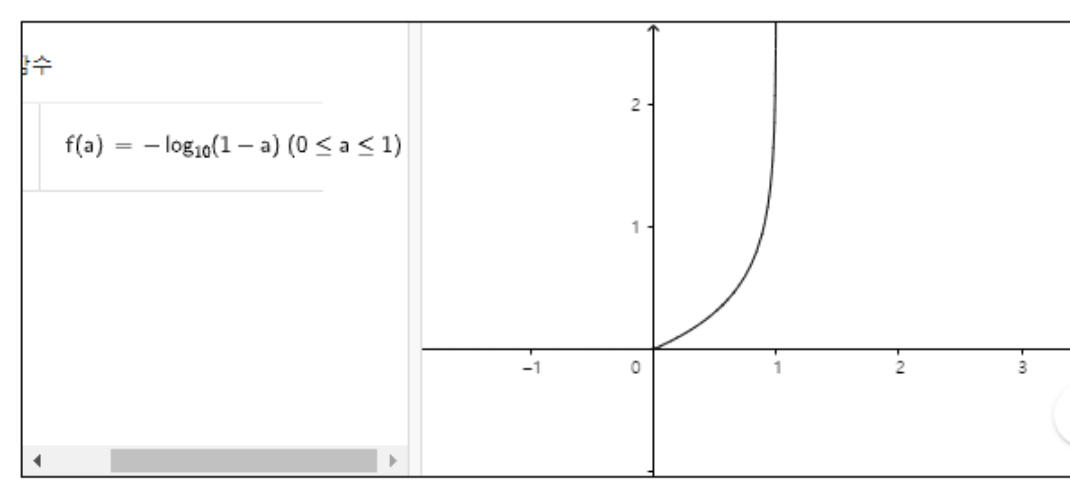

- L이 최소화 될때 샘플이 올바르게 분류되는 방향으로 a값이 구해짐
- 즉,L의 값이 최소화될때 로지스틱 회귀 모델의 목표가 달성된다. 
- 즉, L(로지스틱 손실함수)는 로지스틱 회귀모델의 손실함수가 될 자격이 있다고 볼 수 있다. 